In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
pd.options.display.max_columns = None

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [5]:
df.shape

(30000, 25)

In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df['default'].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

Text(0, 0.5, 'Count')

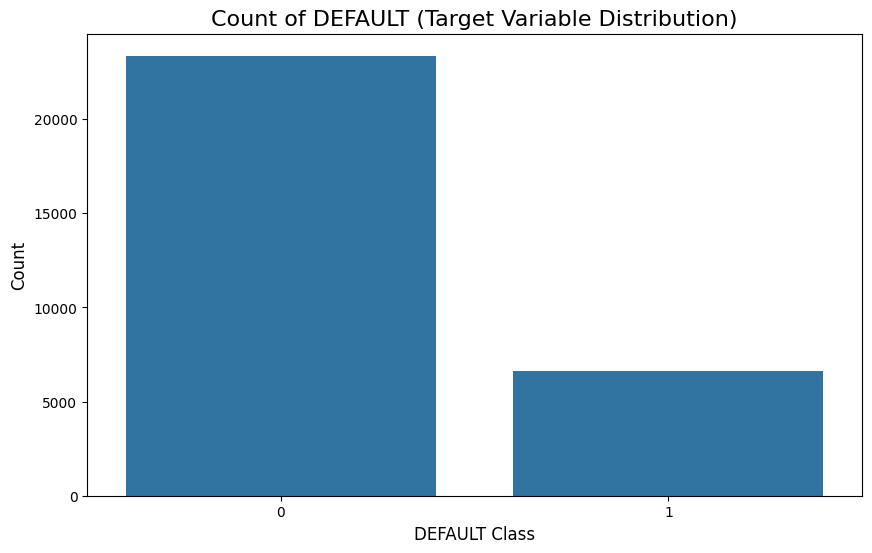

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='default', data=df)
plt.title('Count of DEFAULT (Target Variable Distribution)', fontsize=16)
plt.xlabel('DEFAULT Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

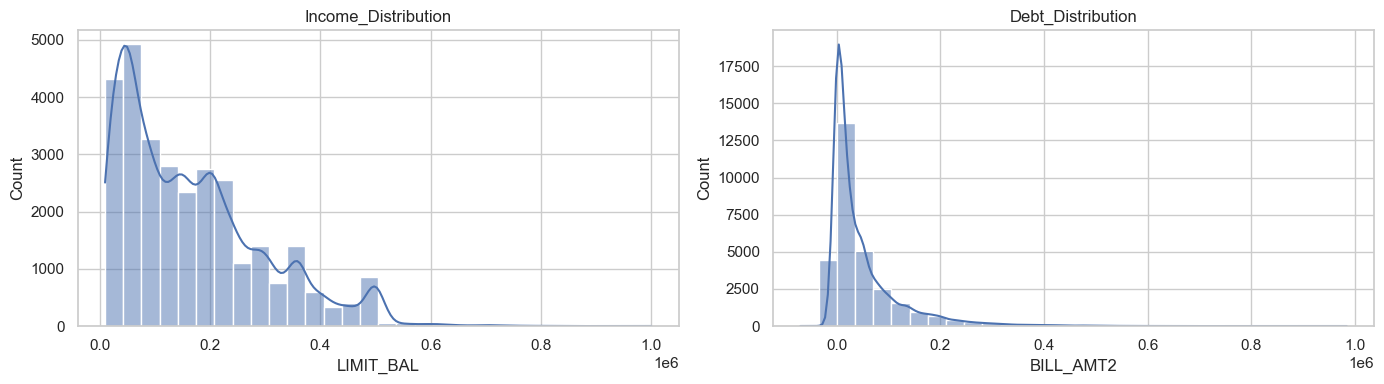

In [9]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1,2, figsize=(14,4))
sns.histplot(df['LIMIT_BAL'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Income_Distribution')

sns.histplot(df['BILL_AMT2'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Debt_Distribution')

plt.tight_layout()
plt.show()

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Cleaning

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
default          2
dtype: int64

In [13]:
df = df.drop(columns = ['ID'])

In [14]:
num_cols=[]
for columns in df.columns:
    if df[columns].nunique()>7:
        num_cols.append(columns)
        
# This list aids in removing transcoded categorical columns 
# or binary columns from valuable numerical columns needed for analysis.

In [15]:
num_cols

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [16]:
# from sklearn.preprocessing import MinMaxScaler
# mmax=MinMaxScaler()

In [17]:
# df[num_cols] = mmax.fit_transform(df[num_cols])
# df.head()

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
df[num_cols] = sc.fit_transform(pd.DataFrame(df[num_cols]))

# Feature Engineering

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [22]:
len(df_full_train), len(df_test)

(24000, 6000)

In [23]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [24]:
len(df_train), len(df_val), len(df_test)

(18000, 6000, 6000)

In [25]:
X = df[num_cols]
X

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [26]:
y = df['default']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

# One hot encoding

In [27]:
from sklearn.feature_extraction import DictVectorizer

In [28]:
dv = DictVectorizer(sparse = False)     

In [29]:
y_train = df_train['default'].values.ravel() # Converts to a 1D numpy array
y_val = df_val['default'].values.ravel()
y_test = df_test['default'].values.ravel()

In [30]:
train_dicts = df_train[num_cols].to_dict(orient='records')
val_dicts = df_val[num_cols].to_dict(orient='records')
test_dicts = df_test[num_cols].to_dict(orient='records') 

In [31]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [32]:
X_train

array([[-0.59510181,  0.80761819,  0.78813952, ..., -0.11656381,
         0.97575354,  2.51921418],
       [ 0.16430256,  1.84590678,  1.77270404, ..., -0.08464735,
         0.14403751, -0.01212243],
       [-1.46299253, -0.60717802, -0.58542312, ..., -0.26976281,
        -0.24868274, -0.27065628],
       ...,
       [-1.24601985, -0.21135884, -0.17020705, ..., -0.24486797,
        -0.25103906, -0.23853643],
       [ 1.57462497, -0.19584984, -0.15411939, ..., -0.18039673,
        -0.18322937, -0.18087821],
       [ 0.92370693, -0.47264893, -0.4459312 , ..., -0.25699623,
        -0.24868274, -0.24838052]], shape=(18000, 20))

# PCA ANALYSIS

In [33]:
# from sklearn.decomposition import PCA

In [34]:
# pca1 = PCA(0.99, random_state = 42)
# pca1

In [35]:
# X_pca = pca1.fit_transform(X)

In [36]:
# X_pca.shape

In [37]:
# pca1.explained_variance_ratio_

In [38]:
# # Only use fit_transform for the X_train dataset to ensure no data leakage
# X_train = pca1.fit_transform(X_train)
# X_val = pca1.transform(X_val)
# X_test = pca1.transform(X_test)

In [39]:
# X_train

In [40]:
# X_train.shape, X_val.shape, X_test.shape

In [41]:
# y_train.shape, y_val.shape, y_test.shape

# Modelling

In [42]:
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    precision_recall_curve, 
    auc
)

# Set random seed for reproducibility
RANDOM_STATE = 42

In [43]:
classifier = {
    "SVM_Model": SVC(kernel='rbf', C=1.0, gamma='auto', probability=True, random_state=42),
    "ada_model": AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=RANDOM_STATE),
    "GB_model": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_split=20, min_samples_leaf=10, random_state=RANDOM_STATE),
    "LGBMClassifier": LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, num_leaves=31, subsample=0.8, colsample_bytree=0.8, random_state=RANDOM_STATE, verbose=-1),
    "logistic Regression": LogisticRegression(random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=20, min_samples_leaf=10, random_state=RANDOM_STATE, n_jobs=-1),
}
# max_depth = 10, num_leaves =  31
# conditions for 3 models:
# random_state=42
# max_depth=10, random_state=1
# n_estimators=10, random_state=1, n_jobs=-1

In [44]:
for name, clf in classifier.items():
    print(f'\n==========={name}===========')
    clf.fit(X_train, y_train)

    # Make predictions
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    y_test_proba = clf.predict_proba(X_test)[:, 1]
    
    print(f'\n Accuracy: {accuracy_score(y_val, y_val_pred)}')
    print(f'\n classification_report: {classification_report(y_val, y_val_pred)}')
    print(f'\n confusion_matrix: {confusion_matrix(y_val, y_val_pred)}')
    print(f'\n roc_auc_score: {roc_auc_score(y_test, y_test_proba)}')


===========SVM_Model===========



 Accuracy: 0.8213333333333334

 classification_report:               precision    recall  f1-score   support

           0       0.84      0.96      0.89      4679
           1       0.69      0.34      0.45      1321

    accuracy                           0.82      6000
   macro avg       0.77      0.65      0.67      6000
weighted avg       0.81      0.82      0.80      6000


 confusion_matrix: [[4482  197]
 [ 875  446]]

 roc_auc_score: 0.716759075527502

===========ada_model===========



 Accuracy: 0.8175

 classification_report:               precision    recall  f1-score   support

           0       0.83      0.97      0.89      4679
           1       0.71      0.29      0.41      1321

    accuracy                           0.82      6000
   macro avg       0.77      0.63      0.65      6000
weighted avg       0.80      0.82      0.79      6000


 confusion_matrix: [[4519  160]
 [ 935  386]]

 roc_auc_score: 0.770442643442521

===========GB_model===========



 Accuracy: 0.8196666666666667

 classification_report:               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4679
           1       0.67      0.36      0.47      1321

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


 confusion_matrix: [[4444  235]
 [ 847  474]]

 roc_auc_score: 0.7736195973618122

===========LGBMClassifier===========



 Accuracy: 0.821

 classification_report:               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4679
           1       0.67      0.36      0.47      1321

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000


 confusion_matrix: [[4447  232]
 [ 842  479]]

 roc_auc_score: 0.7761069935652509

===========logistic Regression===========

 Accuracy: 0.8083333333333333

 classification_report:               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4679
           1       0.71      0.22      0.34      1321

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000


 confusion_matrix: [[4560  119]
 [1031  290]]

 roc_auc_score: 0.7237215393032661

===========Decision Tree===========



 Accuracy: 0.8108333333333333

 classification_report:               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4679
           1       0.62      0.37      0.46      1321

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000


 confusion_matrix: [[4380  299]
 [ 836  485]]

 roc_auc_score: 0.722979370531168

===========Random Forest===========



 Accuracy: 0.82

 classification_report:               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4679
           1       0.67      0.36      0.47      1321

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


 confusion_matrix: [[4449  230]
 [ 850  471]]

 roc_auc_score: 0.7789762209253739


# XGBoost

In [45]:
# # 1. Get the actual number of components retained by PCA
# n_components = 16

# # 2. Create new, generic feature names (PC1, PC2, ..., PC18)
# features = [f'PC{i+1}' for i in range(16)]

features = dv.get_feature_names_out().tolist()

# 3. Create the DMatrices
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [46]:
X_train.shape, y_train.shape

((18000, 20), (18000,))

In [47]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 42,
    'verbosity': 1,
    
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [48]:
model.predict(dtrain)

array([0.00851496, 0.59951067, 0.07776071, ..., 0.0503764 , 0.07255261,
       0.1841031 ], shape=(18000,), dtype=float32)

In [49]:
y_pred_proba = model.predict(dval)

# 2. Create Hard Class Predictions (y_pred)
# Convert probabilities to 0 or 1 based on a threshold (0.5 is standard)
y_pred = (y_pred_proba >= 0.5).astype(int)

In [50]:
print(f"Prediction probability array shape: {y_pred_proba.shape}")
print(f"Sample predictions (probabilities): {y_pred_proba[:5]}")

# 3. Calculate the ROC AUC Score
# roc_auc_score requires the true labels (y_val) and the prediction probabilities (y_pred_proba).
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'\n Accuracy: {accuracy_score(y_val, y_pred)}') 
print(f'\n classification_report: {classification_report(y_val, y_pred)}')
print(f'\n confusion_matrix: {confusion_matrix(y_val, y_pred)}')
print(f"The ROC AUC Score: {roc_auc:.4f}")

Prediction probability array shape: (6000,)
Sample predictions (probabilities): [0.02616755 0.3146524  0.00334432 0.04641652 0.5350634 ]

 Accuracy: 0.8071666666666667

 classification_report:               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4679
           1       0.61      0.36      0.45      1321

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000


 confusion_matrix: [[4372  307]
 [ 850  471]]
The ROC AUC Score: 0.7570


# Updated XGBoost

In [51]:
watchlist = [(dtrain,"train"), (dval, "val")]

In [52]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,

    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': RANDOM_STATE,
    
}
model = xgb.train(xgb_params,
                  dtrain,
                  early_stopping_rounds=10,
                  verbose_eval = 2,
                  evals = watchlist,
                  num_boost_round=200)

In [53]:
model.predict(dtrain)

array([0.12421051, 0.11212915, 0.16100916, ..., 0.05562969, 0.10623226,
       0.14193906], shape=(18000,), dtype=float32)

In [54]:
y_pred_proba = model.predict(dval)

# 2. Create Hard Class Predictions (y_pred)
# Convert probabilities to 0 or 1 based on a threshold (0.5 is standard)
y_pred = (y_pred_proba >= 0.5).astype(int)

In [55]:
print(f"Prediction probability array shape: {y_pred_proba.shape}")
print(f"Sample predictions (probabilities): {y_pred_proba[:5]}")

# 3. Calculate the ROC AUC Score
# roc_auc_score requires the true labels (y_val) and the prediction probabilities (y_pred_proba).
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'\n Accuracy: {accuracy_score(y_val, y_pred)}') 
print(f'\n classification_report: {classification_report(y_val, y_pred)}')
print(f'\n confusion_matrix: {confusion_matrix(y_val, y_pred)}')
print(f"The ROC AUC Score: {roc_auc:.4f}")

Prediction probability array shape: (6000,)
Sample predictions (probabilities): [0.06422089 0.26848668 0.07142494 0.2642043  0.47199762]

 Accuracy: 0.8223333333333334

 classification_report:               precision    recall  f1-score   support

           0       0.84      0.96      0.89      4679
           1       0.69      0.35      0.47      1321

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000


 confusion_matrix: [[4469  210]
 [ 856  465]]
The ROC AUC Score: 0.7830


In [56]:
s = output.stdout

In [57]:
print(s)

[0]	train-auc:0.74529	val-auc:0.71383
[2]	train-auc:0.79021	val-auc:0.76503
[4]	train-auc:0.79622	val-auc:0.77224
[6]	train-auc:0.80071	val-auc:0.77209
[8]	train-auc:0.80355	val-auc:0.77367
[10]	train-auc:0.80715	val-auc:0.77600
[12]	train-auc:0.80903	val-auc:0.77738
[14]	train-auc:0.81150	val-auc:0.77903
[16]	train-auc:0.81405	val-auc:0.77971
[18]	train-auc:0.81672	val-auc:0.78136
[20]	train-auc:0.81895	val-auc:0.78156
[22]	train-auc:0.82157	val-auc:0.78181
[24]	train-auc:0.82361	val-auc:0.78186
[26]	train-auc:0.82614	val-auc:0.78219
[28]	train-auc:0.82740	val-auc:0.78247
[30]	train-auc:0.82949	val-auc:0.78307
[32]	train-auc:0.83161	val-auc:0.78359
[34]	train-auc:0.83391	val-auc:0.78354
[36]	train-auc:0.83701	val-auc:0.78347
[38]	train-auc:0.83912	val-auc:0.78342
[40]	train-auc:0.84181	val-auc:0.78311
[42]	train-auc:0.84357	val-auc:0.78302
[44]	train-auc:0.84584	val-auc:0.78309
[45]	train-auc:0.84635	val-auc:0.78302



In [58]:
line= s.split('\n')[0]

In [59]:
line.split('\t')

['[0]', 'train-auc:0.74529', 'val-auc:0.71383']

In [60]:
num_iter, train_auc, val_auc = line.split('\t')

In [61]:
num_iter.strip('[]')

'0'

In [62]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [63]:
df_score = parse_xgb_output(output)

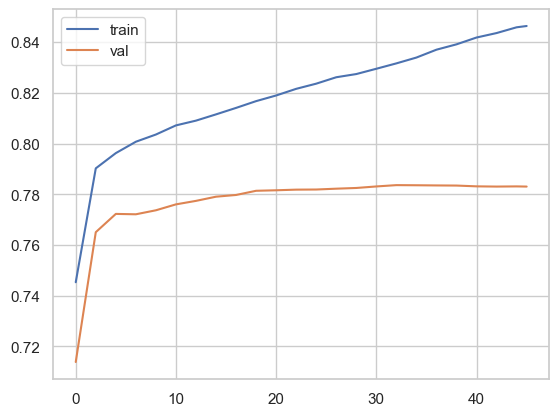

In [64]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [65]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,

    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': RANDOM_STATE,
    
}
model = xgb.train(xgb_params,
                  dtrain,
                  early_stopping_rounds=10,
                  verbose_eval = 2,
                  evals = watchlist,
                  num_boost_round=200)

In [66]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,

    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': RANDOM_STATE,
    
}
model = xgb.train(xgb_params,
                  dtrain,
                  early_stopping_rounds=10,
                  verbose_eval = 2,
                  evals = watchlist,
                  num_boost_round=200)

In [67]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,

    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': RANDOM_STATE,
    
}
model = xgb.train(xgb_params,
                  dtrain,
                  early_stopping_rounds=10,
                  verbose_eval = 2,
                  evals = watchlist,
                  num_boost_round=200)

In [68]:
# key = 'max_depth=%s' % (xgb_params['max_depth'])
# scores[key] = parse_xgb_output(output)
# key

In [69]:
depths = [3, 6, 10]
scores = {} # <-- IMPORTANT: Initialize scores OUTSIDE the loop!

for d in depths:
    # Set the current depth in the parameters
    xgb_params['max_depth'] = d

    # Parse and save the results
    key = f'max_depth={d}'
    # IMPORTANT: Ensure 'output' is accessible and holds the logs for this run
    scores[key] = parse_xgb_output(output)
    print(f"Stored key: {key} with {len(scores[key])} rounds.")

Stored key: max_depth=3 with 12 rounds.
Stored key: max_depth=6 with 12 rounds.
Stored key: max_depth=10 with 12 rounds.


In [70]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=6', 'max_depth=10'])

Available keys in the 'scores' dictionary:
dict_keys(['max_depth=3', 'max_depth=6', 'max_depth=10'])


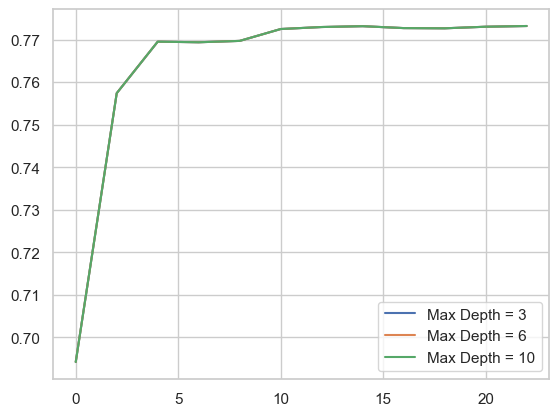

In [71]:
max_depths = ['max_depth=3', 'max_depth=6', 'max_depth=10']

print("Available keys in the 'scores' dictionary:")
print(scores.keys())

for key in max_depths:
    df_scores = scores[key]
    depth_value = key.split('=')[1]
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=f'Max Depth = {depth_value}')
    
plt.legend()
plt.grid(True)
plt.show()


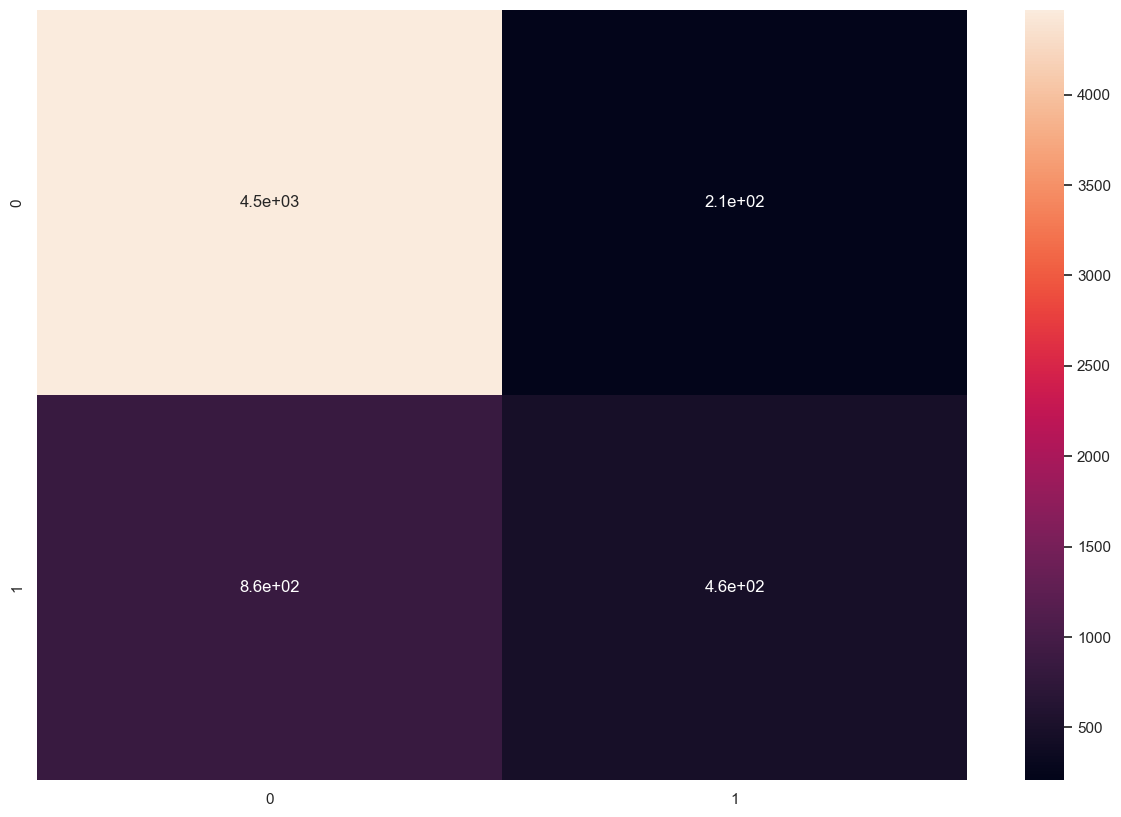

In [72]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

# Saving Best Model - XGBoost

In [73]:
### Create a Pickle file using serialization 
import pickle

with open('credit_card_client_dataset.pkl', 'wb') as f: 
    pickle.dump(dv, f) 
    pickle.dump(model, f)
    pickle.dump(sc, f)

# Validating Pickle File

In [74]:
import pickle

with open('credit_card_client_dataset.pkl', 'rb') as f:
    loaded_dv = pickle.load(f) 
    loaded_model = pickle.load(f)
    loaded_sc = pickle.load(f)

print(f"Type of loaded dv: {type(loaded_dv)}")
print(f"Type of loaded model: {type(loaded_model)}")
print(f"Type of loaded sc: {type(loaded_sc)}")

Type of loaded dv: <class 'sklearn.feature_extraction._dict_vectorizer.DictVectorizer'>
Type of loaded model: <class 'xgboost.core.Booster'>
Type of loaded sc: <class 'sklearn.preprocessing._data.StandardScaler'>
